#### Montando entorno

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import json

In [2]:
import os

# Obtiene la ubicación completa del archivo del notebook
notebook_path = os.path.realpath('__file__')

# Obtiene la ruta absoluta de la carpeta "Coderhouser-DS-TP0002" sin importar donde te encuentres
path_base = os.path.abspath(os.path.join(notebook_path, "..", "..", "..", "..", "Coderhouser-DS-TP0002"))

print("Path base:", path_base)
print("Directorio actual:", os.getcwd())

Path base: C:\develoment\Coderhouser-DS-TP0002
Directorio actual: c:\develoment\Coderhouser-DS-TP0002\models\KNN


In [3]:
import sys
sys.path.append(path_base + r"\models")

In [4]:
# Importacion de sklearn para el modelo KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report, ConfusionMatrixDisplay, confusion_matrix
import joblib

In [5]:
def model_train_test(model, xts, xTest, yTrain, yTest):
    model.fit(xts, yTrain)
    y_predict = model.predict(xTest)
    print(classification_report(yTest, y_predict))
    ConfusionMatrixDisplay.from_estimator(model, xTest, yTest)

In [6]:
# Generando el Dataframe del dataset base
df = pd.read_csv( path_base + r"\\data\procesed\blueTeam.csv")
test_data = pd.read_csv( path_base + r"\\data\procesed\redTeam.csv")

#### Definiendo Características 

In [7]:
with open(path_base + r"\\models\features.json", 'r') as archivo:
    featuresDicc = json.load(archivo)

In [8]:
for feature in featuresDicc["grupos"]:
    print(feature['nombre'])

Conjunto de Características de Visión
Conjunto de Características de Rendimiento en Combate
Conjunto de Características de Desarrollo y Experiencia
Conjunto de Características de Combate Temprano
Conjunto de Características Económicas
Conjunto de Características de Desempeño en Dragones y Heralds


In [9]:
df_pred = df[featuresDicc["grupos"][4]['variables']+["Wins"]]

### Construyendo el modelo KNN
Este fragmento de código es esencial para preparar los datos antes de realizar cualquier análisis o modelado. La selección y estandarización de características son pasos cruciales para garantizar que los datos estén en un formato adecuado y que las características tengan una escala comparable, lo que puede mejorar la eficacia y la interpretación de los análisis posteriores.

In [10]:
X = df_pred.drop("Wins", axis = 1)
y = df["Wins"]

#### División de Datos:
En estas líneas, los datos se dividen en características (X) y etiquetas (y). Luego, se realizan divisiones adicionales para crear conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test) utilizando train_test_split. Se especifica un tamaño de prueba del 20% y se utiliza stratify para asegurarse de que la proporción de etiquetas en los conjuntos de prueba y entrenamiento sea similar.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

#### Estandarización de Características:
Aquí, se crea una instancia del escalador StandardScaler y se utiliza para estandarizar las características en los conjuntos de entrenamiento y prueba. fit_transform se usa en el conjunto de entrenamiento y transform en el conjunto de prueba para garantizar que se utilicen los mismos parámetros de escalado.

- selected_features = blueTeam[features]: Esto selecciona las columnas de características específicas del equipo "blue" que se utilizarán para el análisis. La variable features debe contener los nombres de las columnas que deseas seleccionar.

- scaler = StandardScaler(): Se crea una instancia del escalador StandardScaler de scikit-learn. Este escalador se utilizará para estandarizar los datos, lo que significa que se centrarán alrededor de cero y tendrán una desviación estándar de uno.

- scaled_features = scaler.fit_transform(selected_features): Aquí se aplica el escalador a las características seleccionadas del equipo "blue". El método fit_transform ajusta el escalador a los datos y luego transforma las características para que estén estandarizadas. El resultado, scaled_features, será una matriz con las características estandarizadas que se utilizarán en el análisis.

In [12]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

#### Entrenamiento del Modelo KNN:
Se crea una instancia del clasificador KNN con 10 vecinos cercanos. Luego, se llama a la función personalizada model_train_test para entrenar y evaluar el modelo. Esta función imprimirá un informe de clasificación y mostrará una matriz de confusión para evaluar el rendimiento del modelo.

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       990
           1       0.71      0.65      0.68       986

    accuracy                           0.69      1976
   macro avg       0.69      0.69      0.69      1976
weighted avg       0.69      0.69      0.69      1976



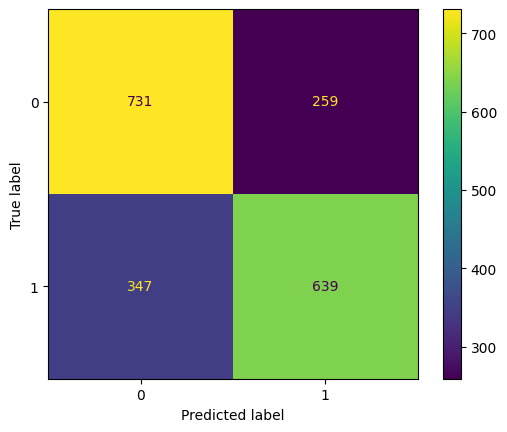

In [13]:
knn = KNeighborsClassifier(n_neighbors = 10)
model_train_test(knn, X_train_scaled, X_test_scaled, y_train, y_test)

#### Visualización de la Precisión:
En este bloque de código, se itera a través de diferentes valores para el número de vecinos (i) en el rango de 1 a 24. Se crea una instancia de KNN con el número actual de vecinos y se entrena con el conjunto de entrenamiento escalado. La precisión del modelo en el conjunto de prueba se almacena en la lista score.

Se crea un gráfico de dispersión que muestra cómo varía la precisión del modelo KNN en función del número de vecinos. Se establece el número de vecinos en el eje X y la precisión en el eje Y. Además, se configuran títulos y etiquetas para mejorar la comprensión del gráfico.

In [14]:
max_accuracies = {}
score = []

for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    score.append(knn.score(X_test_scaled, y_test))

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, 25)), y=score, mode='lines+markers'))
fig.update_xaxes(tickvals=list(range(1, 25)))
fig.update_layout(
    title="Variación de la precisión con el número de vecinos (K-Nearest Neighbors)",
    xaxis_title="Números de vecinos",
    yaxis_title="Exactitud",
)

max_accuracy = max(score) * 100
max_accuracy_K = score.index(max(score)) + 1

print("La máxima precisión de K-Vecinas más cercanas es {:.2f}%".format(max_accuracy),
      "Con el número de vecinas establecida en", max_accuracy_K, "neighbours.")

fig.show()
fig.write_html(path_base + r"\\static\html\knn_precision.html")
fig.write_image(path_base + r"\\static\img\knn_precision.png")

La máxima precisión de K-Vecinas más cercanas es 70.45% Con el número de vecinas establecida en 20 neighbours.


### Creandoo un Bucle de modelos segun los grupo de Feature marcados

In [15]:
# Crear un DataFrame con los totales
totals = pd.DataFrame({"Categoría": ["Real"], "Total": [test_data["Wins"].sum()]})

In [16]:
def train_knn_model(features_list, df):
    model_scores = []
    X = df[features_list['variables']]
    y = df["Wins"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for i in range(1, 25):
        knn_model = KNeighborsClassifier(n_neighbors=i)
        knn_model.fit(X_train_scaled, y_train)
        score = knn_model.score(X_test_scaled, y_test)
        model_scores.append(score)

    max_accuracy = max(model_scores) * 100
    return knn_model, max_accuracy, model_scores

In [17]:
fig = go.Figure()
set_number = 1
modelos = {}

for featureList in featuresDicc["grupos"]:
    model, max_accuracy, model_scores = train_knn_model(featureList, df)
    modelos["set_" + str(set_number)] = model
    fig.add_trace(go.Scatter(x=list(range(1, 25)), y=model_scores, mode='lines+markers', name=featureList["nombre"].replace("Conjunto de Características","Features")))
    name = "Modelo " + str(set_number) 
    test = test_data[featureList['variables']]
    predictions = model.predict(test)
    test_data[name] = predictions

    totals.loc[set_number] = [name, test_data[name].sum()]
    featuresDicc["grupos"][set_number-1]["KNN"] = max_accuracy

    joblib.dump(model, f'KNN_{name}.pkl')

    set_number += 1


c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



In [18]:

fig.update_xaxes(tickvals=list(range(1, 25)))
fig.update_layout(
    title="Variación de la precisión con el número de vecinos (K-Nearest Neighbors)",
    xaxis_title="Números de vecinos",
    yaxis_title="Exactitud",
    showlegend=False)

fig.write_html(path_base + r"\\static\html\knn_features_comparations.html")
fig.write_image(path_base + r"\\static\img\knn_features_comparations.png")
fig.show()

In [19]:
from sklearn.model_selection import learning_curve
import numpy as np

resultados = {}

def plot_learning_curve(models, X, y, cv=5):
    fig = go.Figure()

    for model_name, model in models.items():
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv)
        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)

        fig.add_trace(go.Scatter(
            x=train_sizes,
            y=train_scores_mean,
            mode='lines',
            name=f'Training Score ({model_name})',
        ))

        fig.add_trace(go.Scatter(
            x=train_sizes,
            y=test_scores_mean,
            mode='lines',
            name=f'Cross-validation Score ({model_name})',
        ))
        df_learning_curve = pd.DataFrame({
                'Training Size': train_sizes,
                'Training Score': np.mean(train_scores, axis=1),
                'Cross-validation Score': np.mean(test_scores, axis=1)
            })
        resultados[model_name] = df_learning_curve

    fig.update_layout(
        title='Curva de Aprendizaje',
        xaxis_title='Tamaño del Conjunto de Entrenamiento',
        yaxis_title='Puntuación de Exactitud',
        legend=dict(x=0.02, y=0.95),
        margin=dict(l=0, r=0, t=30, b=0)
    )

    fig.show()
    fig.write_html(path_base + r"\\static\html\knn_learning_curve.html")
    fig.write_image(path_base + r"\\static\img\knn_learning_curve.png")

plot_learning_curve(modelos, X_train, y_train)


### Aplicando modelo con Red
El siguiente informe presenta la evaluación del modelo KNN aplicado a los datos del equipo Red. El objetivo de este análisis es determinar la capacidad del modelo entrenado en los datos del equipo Blue para generalizar y realizar predicciones precisas en el contexto de los datos del equipo Red.

In [20]:
# Calcular la diferencia entre cada modelo y el valor "Real"
totals['Diferencia_Real'] = totals['Total'] - totals.loc[totals['Categoría'] == 'Real', 'Total'].values[0]

In [21]:
# Crear un gráfico de barras
fig_comparison = px.bar(totals, x="Categoría", y="Total", text="Total", color='Diferencia_Real', color_continuous_scale=['red', 'green', 'red'],
                        title="Comparación del Total de partidas Reales (Wins) vs Modelos de Features",
                        labels={"Categoría": "Categoría", "Total": "Total"})

# Mostrar el gráfico
fig_comparison.update_traces(texttemplate='%{text}', textposition='outside')
fig_comparison.show()
fig_comparison.write_html(path_base + r"\\static\html\knn_models_comparations.html")
fig_comparison.write_image(path_base + r"\\static\img\knn_models_comparations.png")

## Control de Modelos con la Matriz de confusión

In [22]:
resultados = test_data[["Wins","Modelo 1","Modelo 2","Modelo 3","Modelo 4","Modelo 5","Modelo 6"]]

In [23]:
columnas_modelos = ["Modelo 1", "Modelo 2", "Modelo 3", "Modelo 4", "Modelo 5", "Modelo 6"]

# Crear un diccionario para almacenar las tablas de resultados
tablas_resultados = {}

# Crear y agregar cada tabla de resultados al diccionario
for modelo in columnas_modelos:
    matriz = confusion_matrix(resultados["Wins"], resultados[modelo])
    df_matriz = pd.DataFrame(matriz, index=["Wins 0", "Wins 1"], columns=["Predicho 0", "Predicho 1"])
    
    # Calcular FN, FP, TN, TP
    FN = df_matriz.loc["Wins 1", "Predicho 0"]
    FP = df_matriz.loc["Wins 0", "Predicho 1"]
    TN = df_matriz.loc["Wins 0", "Predicho 0"]
    TP = df_matriz.loc["Wins 1", "Predicho 1"]

    # Crear la tabla de resultados y agregar al diccionario
    tabla_resultados = pd.DataFrame({"Modelo": [modelo], "FN": [FN], "FP": [FP], "TN": [TN], "TP": [TP]})
    tablas_resultados[modelo] = tabla_resultados

# Concatenar las tablas en un solo DataFrame
df_resultados_completo = pd.concat(tablas_resultados.values(), ignore_index=True)

In [24]:
df_resultados_completo

,Modelo,FN,FP,TN,TP
0,Modelo 1,4928,20,4910,21
1,Modelo 2,715,2142,2788,4234
2,Modelo 3,0,4930,0,4949
3,Modelo 4,949,3487,1443,4000
4,Modelo 5,465,2635,2295,4484
5,Modelo 6,1332,1366,3564,3617


In [25]:
radarData = df_resultados_completo.melt(id_vars="Modelo")

In [26]:

fig = px.line_polar(radarData, r='value', theta="variable",
                    line_close=True, title="Superposicion de Matrices de confusión",
                    color="Modelo")
fig.update_traces(fill='toself')
fig.write_html(path_base + r"\\static\html\knn_Matrices_confusión.html")
fig.write_image(path_base + r"\\static\img\knn_Matrices_confusión.png")
fig.show()

### Control de Modelos con la Curva ROC

In [27]:
# Función para plotear la curva ROC en Plotly
def plot_roc_curve_plotly(models):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], 
                            mode='lines', 
                            line=dict(color='navy', width=2, dash='dash'),
                            name='Random'))
    for model_name, model in models.items():  
        setFeature = featuresDicc["grupos"][int(model_name.split("_")[1])-1]      
        X = df[setFeature['variables']]
        y = df["Wins"]
        y_probs = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_probs)
        roc_auc = auc(fpr, tpr)

        fig.add_trace(go.Scatter(x=fpr, y=tpr, 
                                mode='lines', 
                                line=dict(color=setFeature["color"], width=2),
                                name=f'{model_name} (AUC = {roc_auc:.2f})'))

    fig.update_layout(
        title=f'Curva ROC de todos los modelos',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        legend=dict(x=0.78, y=0.02),
        margin=dict(l=0, r=0, t=30, b=0)
    )

    fig.show()
    fig.write_html(path_base + r"\\static\html\knn_curve_roc.html")
    fig.write_image(path_base + r"\\static\img\knn_curve_roc.png")

In [28]:
plot_roc_curve_plotly(modelos)

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



## Guardado de los resultados sobre el catálogo de Features

In [29]:
with open(path_base + r"\\models\features.json", 'w') as archivo:
    json.dump(featuresDicc, archivo)